In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def load_data():
    df = pd.read_csv("../files/input/shipping-data.csv")
    return df

In [9]:
from pathlib import Path

outdir = Path("../docs")
outdir.mkdir(exist_ok=True)

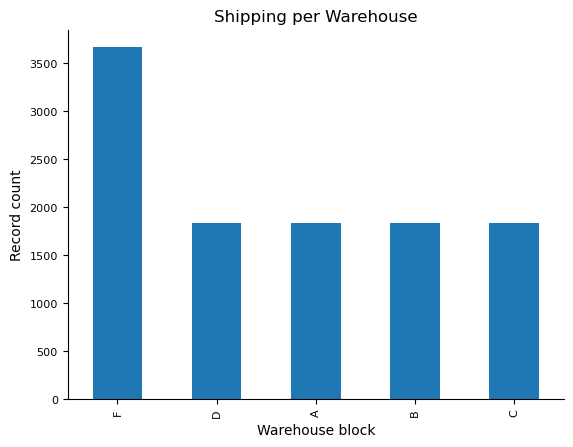

In [10]:
def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title = "Shipping per Warehouse",
        xlabel = "Warehouse block",
        ylabel = "Record count",
        color = "tab:blue",
        fontsize = 8,
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig(outdir / "shipping_per_warehouse.png")

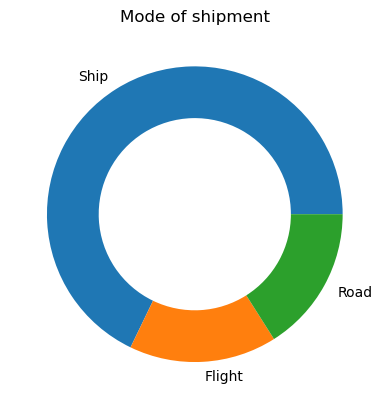

In [13]:
def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = "Mode of shipment",
        wedgeprops = dict(width=0.35),
        ylabel = "",
        colors = ["tab:blue", "tab:orange", "tab:green"]
    )
    plt.savefig(outdir / "mode_of_shipment.png")

['tab:orange', 'tab:orange', 'tab:orange']

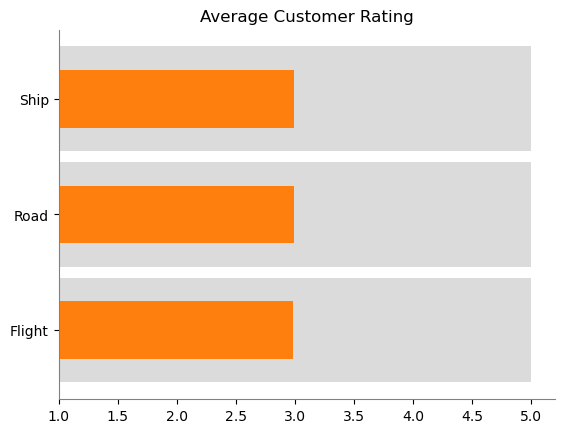

In [23]:
def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    plt.barh(
        y = df.index.values,
        width = df["max"].values - 1,
        left = df["min"].values,
        height = 0.9,
        color = "lightgray",
        alpha = 0.8,
    )
    colors = [
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]
    plt.barh(
        y = df.index.values,
        width = df["mean"].values - 1,
        left = df["min"].values,
        color=colors,
        height = 0.5,
        alpha = 1.0,
    )
    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig(outdir / "average_customer_rating.png")

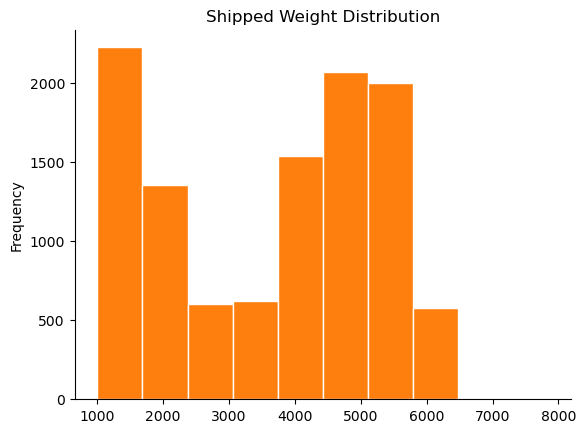

In [25]:
def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title = "Shipped Weight Distribution",
        color = "tab:orange",
        edgecolor = "white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig(outdir / "weight_distribution.png")

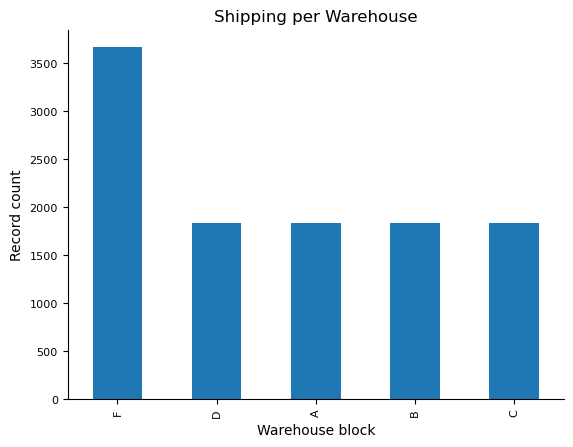

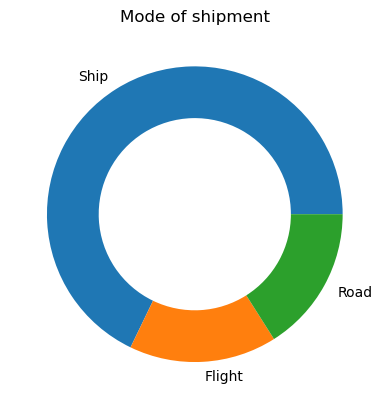

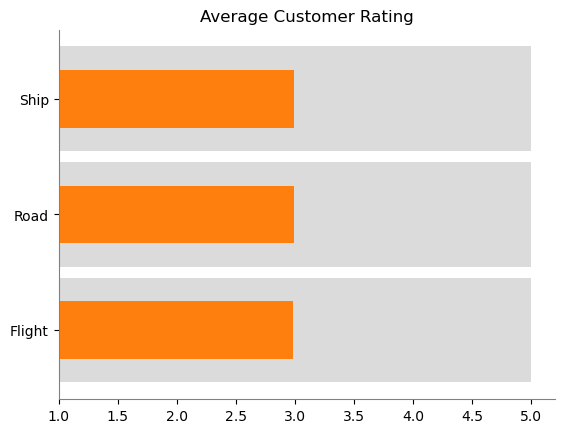

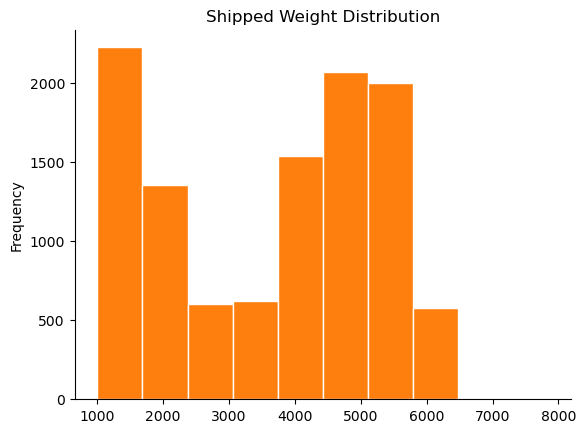

In [26]:
df = load_data()
create_visual_for_shipping_per_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_rating(df)
create_visual_for_weight_distribution(df)